# IMPORT LIBS

In [1]:
!pip install -q yfinance


In [32]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# Getting Data

In [2]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-27,174.080002,174.619995,172.860001,173.539993,173.539993,31141700,AMAZON
2024-02-28,172.440002,174.050003,172.270004,173.160004,173.160004,28180500,AMAZON
2024-02-29,173.009995,177.220001,172.850006,176.759995,176.759995,53805400,AMAZON
2024-03-01,176.750000,178.729996,176.070007,178.220001,178.220001,31956200,AMAZON
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON
2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900,AMAZON
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON


**The dataset contains the following features for stock market data:**

**Company name**: The stock ticker symbol.

**Date**: The specific trading date.

**Open**: Opening price of the stock for the day.

**High**: Highest price point of the stock during the day.

**Low**: Lowest price point during the day.

**Close**: Closing price of the stock.

**Adj Close**: Adjusted closing price, factoring in corporate actions like splits.

**Volume**: Total trading volume of the stock.

## Descriptive Statistics about the Data

In [12]:
df.groupby('company_name')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
company_name,,,,,,,,
AMAZON,251.0,134.278128,20.756557,92.430000,124.485001,133.139999,146.955002,178.220001
APPLE,251.0,180.071036,10.591910,150.470001,173.220001,180.710007,189.334999,198.110001
GOOGLE,251.0,128.775916,13.344069,91.660004,122.254997,131.789993,138.599998,154.839996
MICROSOFT,251.0,342.641236,38.566186,253.919998,319.750000,334.290009,373.165009,420.549988


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3066 entries, 2012-01-03 to 2024-03-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3066 non-null   float64
 1   High       3066 non-null   float64
 2   Low        3066 non-null   float64
 3   Close      3066 non-null   float64
 4   Adj Close  3066 non-null   float64
 5   Volume     3066 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 167.7 KB


Observations:

AAPL: Apple The mean closing price is 158.24 and the standard deviation is 7.36.

GOOG: Google The mean closing price is 100.63, with a standard deviation of 6.28, indicating less variability in clossing prices compared to AAPL.

MSFT: MicroSoft It has higher mean closing price of 275.04 and a higher standard deviation of 17.28, suggesting greater price variability than AAPL and GOOG.

AMZN: ...

# Closing Price

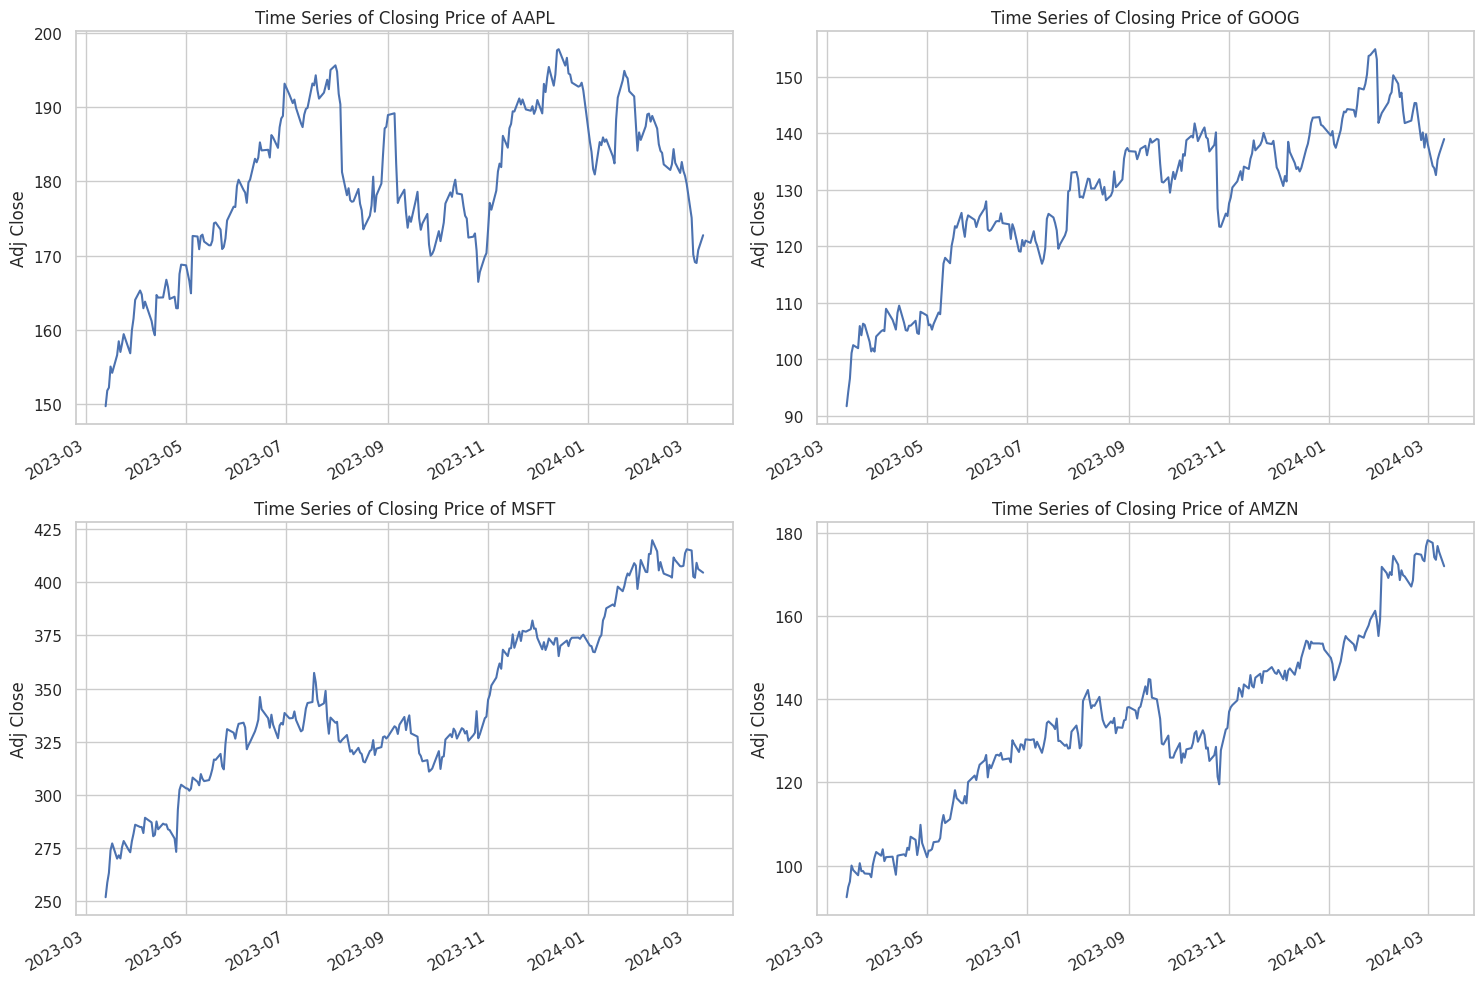

In [13]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Time Series of Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

# Average of the various stocks

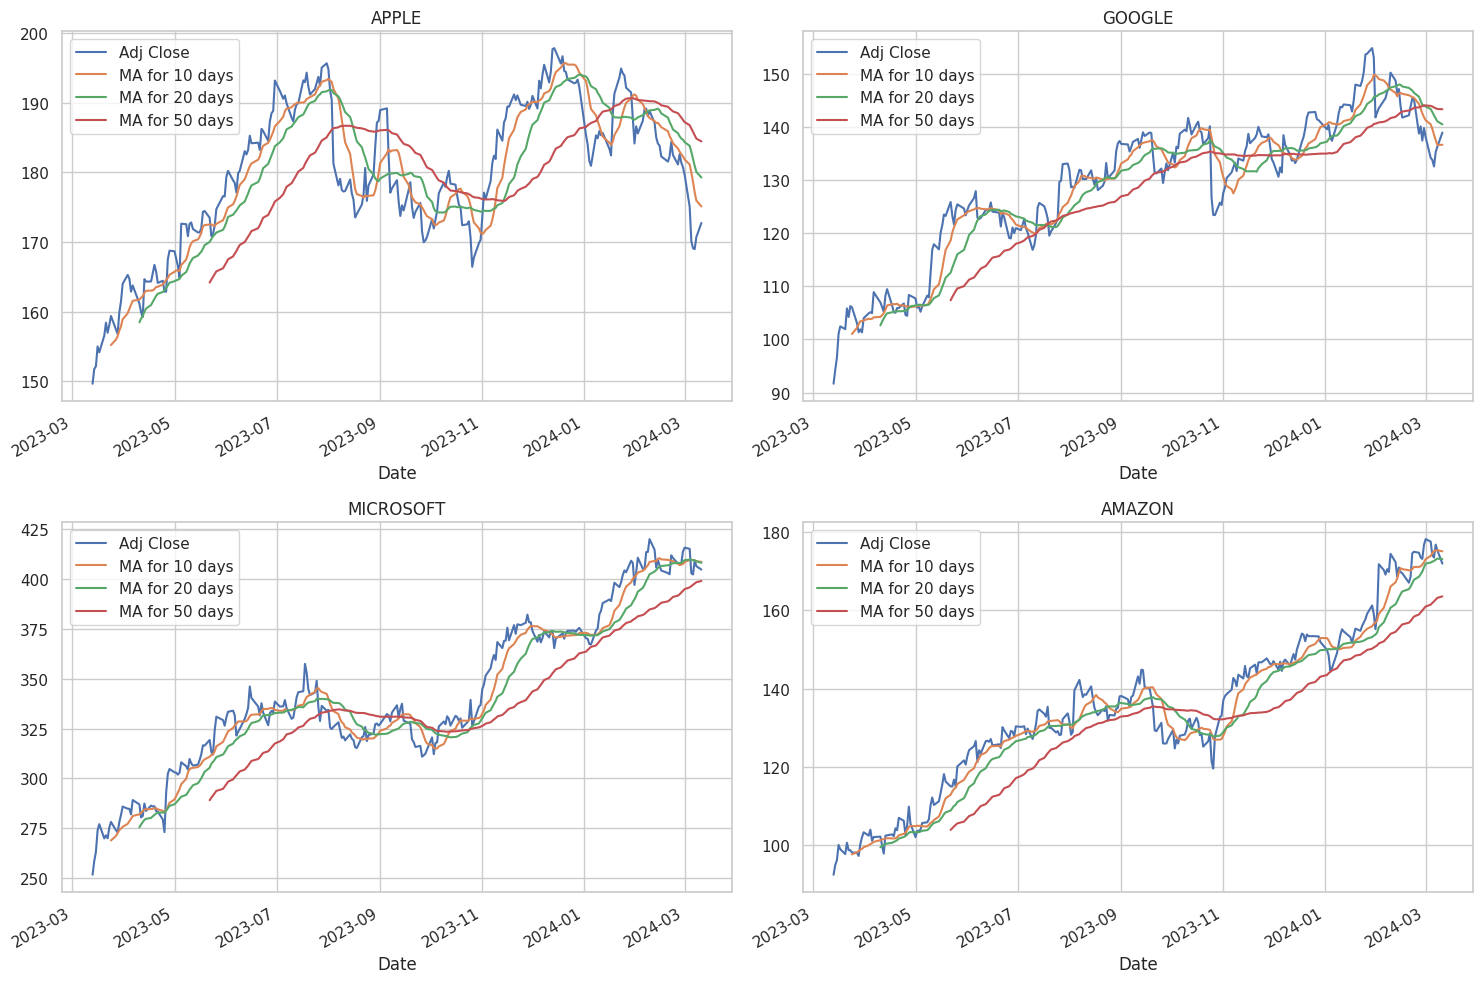

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Correlation Analysis

In [22]:
pivot_df = df.pivot(columns = 'company_name', values = 'Close')
pivot_df.head()

company_name,AMAZON,APPLE,GOOGLE,MICROSOFT
Date,,,,
2023-03-13,92.430000,150.470001,91.660004,253.919998
2023-03-14,94.879997,152.589996,94.250000,260.790009
2023-03-15,96.199997,152.990005,96.550003,265.440002
2023-03-16,100.040001,155.850006,101.070000,276.200012
2023-03-17,98.949997,155.000000,102.459999,279.429993


In [41]:
correlation_matrix = pivot_df.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Company Name',
    yaxis_title='Company Name'
)

fig.show()

# Comparative Analysis

In [39]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_df.iloc[-1] - pivot_df.iloc[0]) / pivot_df.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'company_name'},
             title='Percentage Change in Closing Prices')
fig.show()

Observations:

MSFT shows the highest positive change with 16.1%
AAPL exhibited a positive change of 12.23% though slightly lower than MSFT.
GOOG showed a slight negative change indicating a minor decline in its stock price over the observed period

In [27]:
daily_returns = pivot_df.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

fig.show()

Observations:

AAPL shows the lowest risk combined with a positive average daily return, suggesting a more stable investment with consistent returns.

GOOG has higher volatility than AAPL and, on average a slightly negative daily return, indicating a riskier and less rewarding investment during this period.

MSFT shows moderate risk with the highest daily return, suggesting a potentially more rewarding investment, although with higher volatility compared to AAPL.


# Predicting AAPL Stock market

In [28]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751304,394024400
...,...,...,...,...,...,...
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400
2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100


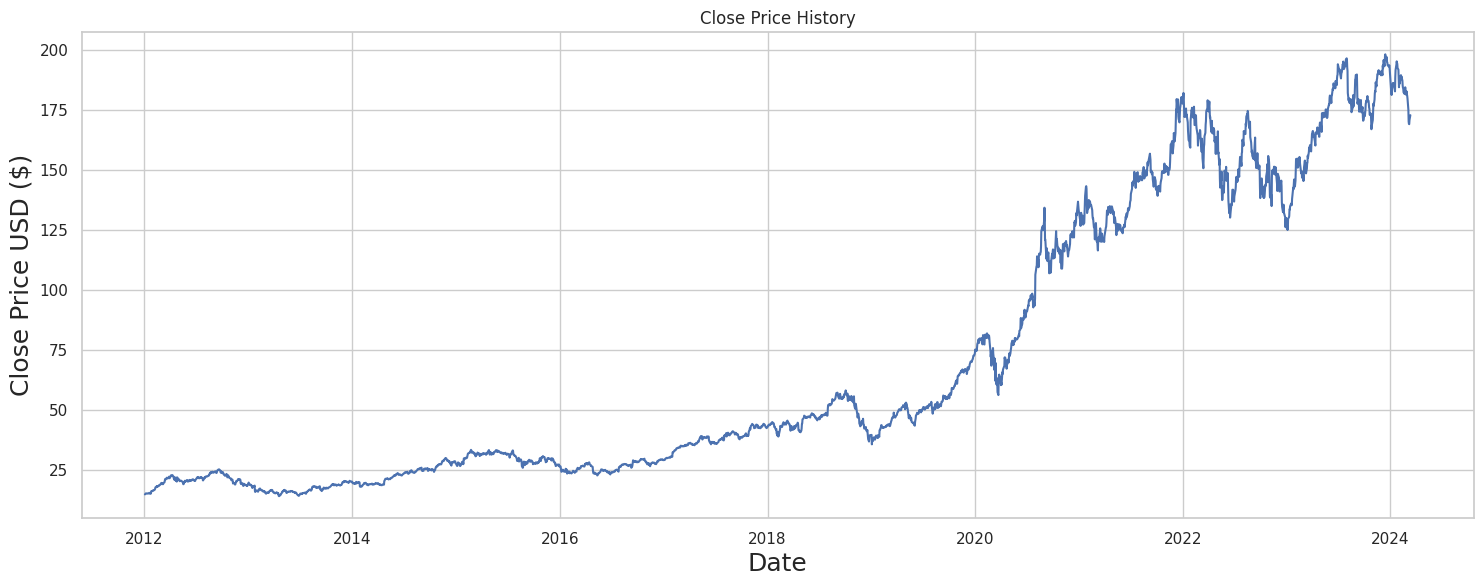

In [29]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2913

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84193307],
       [0.85132693],
       [0.86229552]])

In [34]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2853/2853 [==============================] - 145s 49ms/step - loss: 9.4527e-04


In [36]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 59ms/step


4.48413636683875

<ipython-input-37-0cdd5e68a3a9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



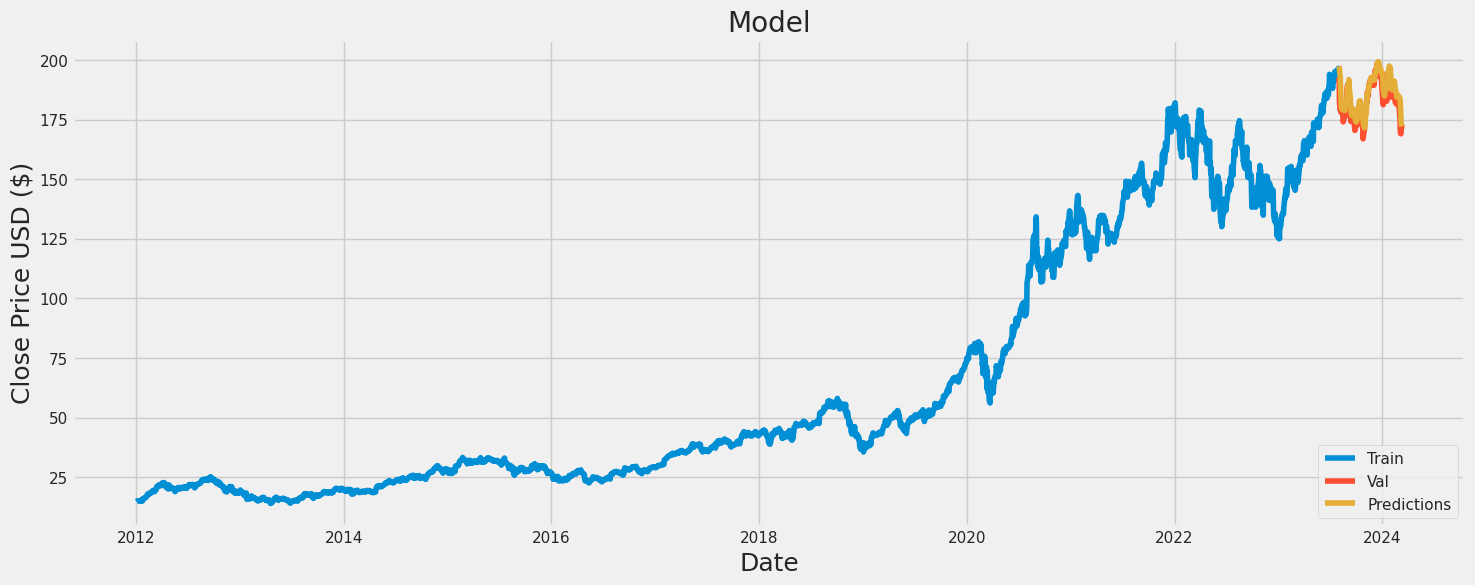

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
valid

,Close,Predictions
Date,,
2023-08-02,192.580002,197.349258
2023-08-03,191.169998,196.944183
2023-08-04,181.990005,195.831558
2023-08-07,178.850006,192.406647
2023-08-08,179.800003,187.983139
...,...,...
2024-03-05,170.119995,182.017273
2024-03-06,169.119995,179.000534
2024-03-07,169.000000,175.831955
